# Import Required Libraries
Import necessary libraries such as PIL (Pillow) for image handling, NumPy for array operations, and Matplotlib for rendering.

In [156]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

# Load and Preprocess Image
Load an image file using PIL, resize it to a suitable resolution for detailed ASCII representation, and convert it to RGB mode.

In [157]:
# Load an image
image_path = 'input.png'
img = Image.open(image_path).convert('RGB')

# Remove white borders by cropping
bbox = img.getbbox()  # Get bounding box of non-white area
if bbox:
    img = img.crop(bbox)

# Preserve aspect ratio: resize to fit within max dimensions
max_ascii_width = 400
max_ascii_height = 300
original_width, original_height = img.size
scale = min(max_ascii_width / original_width, max_ascii_height / original_height)
ascii_width = int(original_width * scale)
ascii_height = int(original_height * scale)
img = img.resize((ascii_width, ascii_height), Image.Resampling.LANCZOS)

# Convert to numpy array for easy access
img_array = np.array(img)

# Define ASCII Character Set
Define a dense set of ASCII characters (e.g., from darkest to lightest) to map pixel intensities for high detail.

In [158]:
# ASCII characters from darkest to lightest for mapping brightness
ascii_chars = " .'`^\",:;Il!i><~+_-?][}{1)(|/tfjrxnuvczXYUJCLQ0OZmwqpdbkhao*#MW&8%B@$"

# Number of characters
n_chars = len(ascii_chars)

# Map Pixels to ASCII Characters with Colors
Iterate over image pixels, map brightness to ASCII characters, and preserve RGB color values for each character to render gradients.

In [159]:
# Initialize lists for ASCII art
ascii_art = []
colors = []

brightness_factor = 2.0  # Increase to make brighter, decrease to make darker
minimalistic = True  # Enable minimalistic mode for dark areas

for y in range(ascii_height):
    row_chars = []
    row_colors = []
    for x in range(ascii_width):
        r, g, b = img_array[y, x]
        # Brighten the colors
        r = min(255, int(r * brightness_factor))
        g = min(255, int(g * brightness_factor))
        b = min(255, int(b * brightness_factor))
        # Calculate brightness using luminance for character selection
        brightness = 0.2126 * r + 0.7152 * g + 0.0722 * b
        # Normalize to 0-1
        brightness /= 255.0
        
        # Minimalistic: turn very dark areas to pure black pixels
        if minimalistic and brightness < 0.4:
            char = ' '
            color = (0, 0, 0)
        else:
            # Map to character index
            char_index = int(brightness * (n_chars - 1))
            char = ascii_chars[char_index]
            color = (r, g, b)
        
        row_chars.append(char)
        row_colors.append(color)
    ascii_art.append(row_chars)
    colors.append(row_colors)

# Render ASCII Art as Image
Use PIL to create a new image where each ASCII character is drawn with its corresponding color and font, ensuring high resolution for detail.

In [160]:
# Font settings
font_size = 8
try:
    font = ImageFont.truetype("cour.ttf", font_size)  # Use Courier or similar monospace
except:
    font = ImageFont.load_default()  # Fallback

# Get character dimensions
bbox = font.getbbox('A')  # Bounding box
char_width = bbox[2] - bbox[0]
char_height = bbox[3] - bbox[1]

# Canvas size
canvas_width = ascii_width * char_width
canvas_height = ascii_height * char_height

# Create image
ascii_image = Image.new('RGB', (canvas_width, canvas_height), (0, 0, 0))  # Black background
draw = ImageDraw.Draw(ascii_image)

# Draw each character
for y in range(ascii_height):
    for x in range(ascii_width):
        char = ascii_art[y][x]
        color = colors[y][x]
        if char == ' ' and color == (0, 0, 0):
            # Minimalistic: fill with pure black
            draw.rectangle((x * char_width, y * char_height, (x + 1) * char_width, (y + 1) * char_height), fill=(0, 0, 0))
        else:
            draw.text((x * char_width, y * char_height), char, fill=color, font=font)

# Display or Save Output Image
Display the rendered ASCII art image in the notebook and provide code to save it to a file.

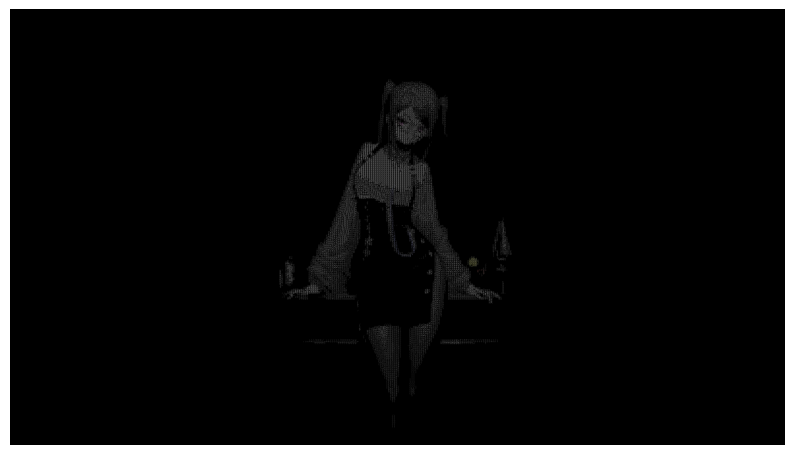

ASCII art image saved as 'ascii_art_output.png'


In [161]:
# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(ascii_image)
plt.axis('off')
plt.show()

# Save the image
ascii_image.save('ascii_art_output.png')
print("ASCII art image saved as 'ascii_art_output.png'")